<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab03/atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Histograma e equalização de histograma
*   Seguimentação com auxilio do histograma
*   Webcam opencv

## Histograma 

Na ultima aula, tentamos fazer a segmentação de um objeto da imagem pelo metodo força bruta #GoHorse, pode ser que funcione mas não é a forma mais intessnte de ser feita. Um histograma pode nos ajudar, ele plota em um gráfico de frequência as componentes de cores (r,g,b ou gray) da imagem.

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.6.0 


In [ ]:
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/bola.png" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/bolinha.png" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/fuca.png" /content



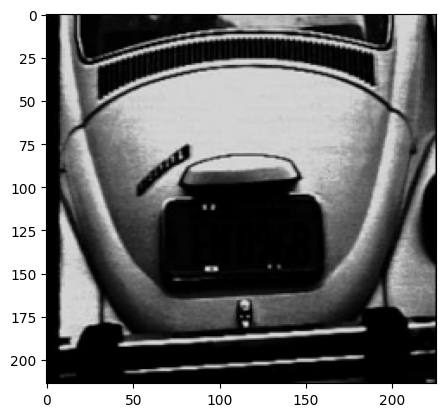

In [2]:
img = cv2.imread("fuca.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)


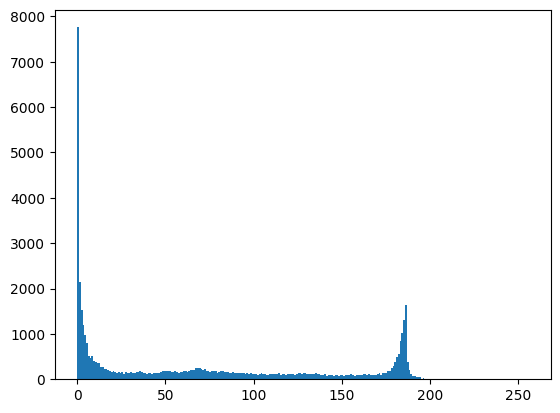

In [3]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

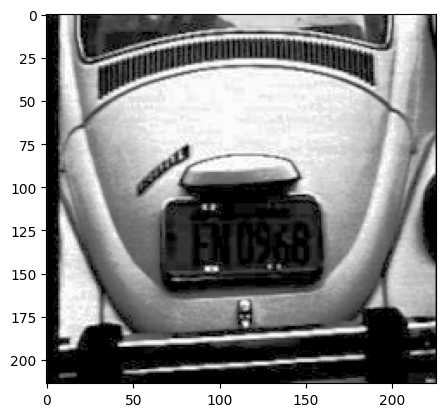

In [5]:
# normalização de histograma

img_eq = cv2.equalizeHist(img)
plt.imshow(img_eq, cmap="Greys_r", vmin=0, vmax=255)

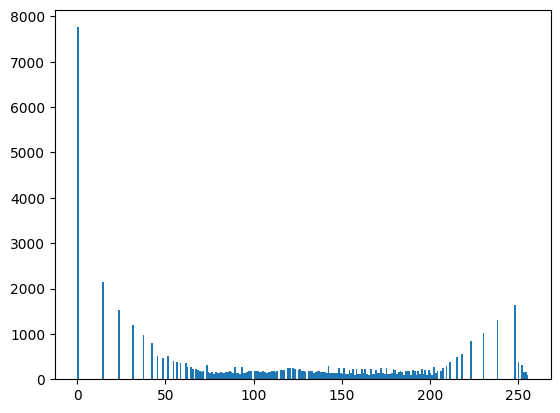

In [6]:
plt.hist(img_eq.ravel(),256,[0,256]); plt.show()

Podemos fazer o mesmo para uma imgem colorida 

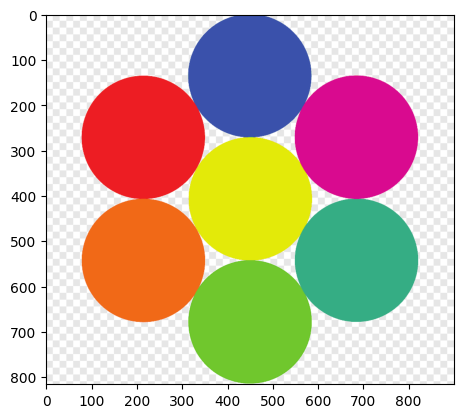

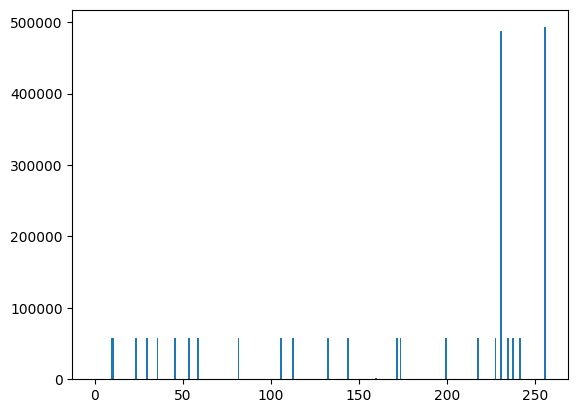

In [7]:
imagem = cv2.imread("bola.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()
plt.hist(image.ravel(),256,[0,256]); plt.show()

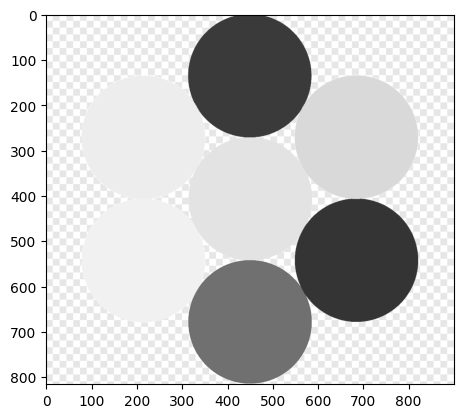

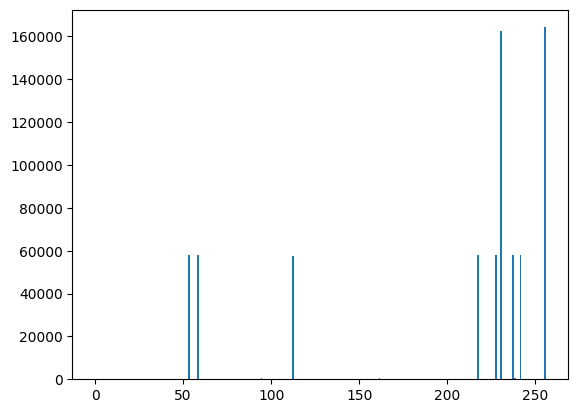

In [8]:
#histograma Vermelho
plt.imshow(image[:,:,0], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()

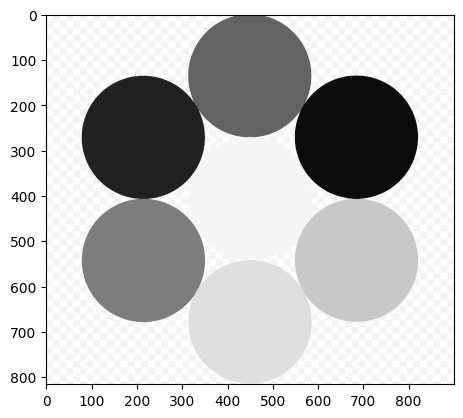

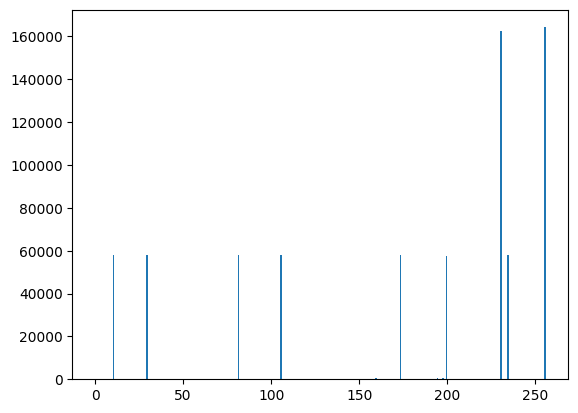

In [9]:
# Histogrma Verde
plt.imshow(image[:,:,1], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()

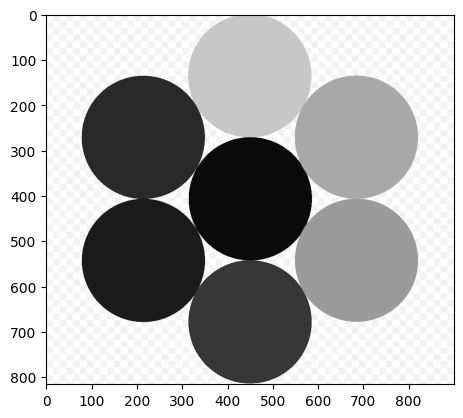

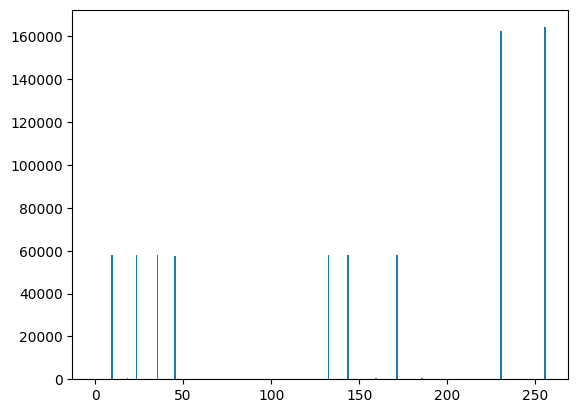

In [10]:
# Histograma Azul
plt.imshow(image[:,:,2], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()

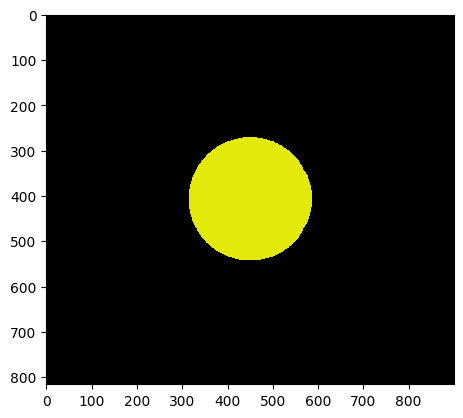

In [11]:
image2 = image.copy()
gray_r = image2[:,:,0]
gray_g = image2[:,:,1]
gray_b = image2[:,:,2]

img_bola = image2.copy()

for y in range(0, image2.shape[0]):
    for x in range(0, image2.shape[1]):
        
        if gray_g[y,x] <= 230:
            img_bola[y,x]= 0
        if gray_b[y,x] >= 240:
            img_bola[y,x]= 0    

    

plt.imshow(img_bola, interpolation="none")
plt.show()

## Desafio 1

Faça a seguimentação da bolinha de cor laranja. Dica use 2 canais de cores para conseguir seguimentar. 

In [ ]:
# Implemente seu código







## Desafio 2 

Faça a seguimentação da bolinha para a imagem "bolinha.png". 

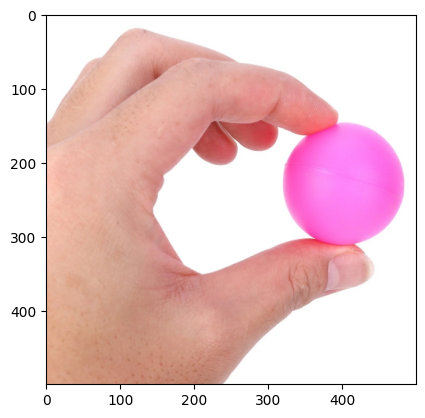

In [12]:
imagem = cv2.imread("bolinha.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()

In [13]:
# Implemente seu código









## Webcam e OpenCV

## **Este recurso não vai funcionar no Google Colab**

Podemos usar a nossa webcam para registrar imagens e vídeos. Para isso, usamos a função `cv2.VideoCapture`.

### Em sua máquina local

1. **Crie um novo arquivo Python** ou use este notebook para executar o código abaixo.

2. **Escolha a fonte do video** se você quiser usar um vídeo MP4 em vez da webcam, basta passar o caminho do arquivo para cv2.VideoCapture:
    -  cv2.VideoCapture(0) # Inicializa a captura de vídeo da webcam (0 é o índice da câmera padrão)
    -  cv2.VideoCapture("video.mp4") # Carrega o arquivo de video



In [15]:
import cv2

# Inicializa a captura de vídeo da webcam (0 é o índice da câmera padrão)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erro: Não foi possível abrir a webcam.")
else:
    while True:
        # Captura frame por frame
        ret, frame = cap.read()

        if not ret:
            print("Erro: Não foi possível capturar o frame.")
            break

        # Exibe o frame capturado
        cv2.imshow('Webcam', frame)

        # Aguarda 1 ms e verifica se a tecla 'q' foi pressionada para sair
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Libera a captura e fecha todas as janelas
    cap.release()
    cv2.destroyAllWindows()

## Desafio 3

Crie um script Python que execute o processameento de um video (webcam ou arquivo mp4) em sua maquina local. Crie uma função que processa a imagem e realizada uma operação de processamento de imagem que vimos até o momento em nosso curso.  

In [ ]:
# implemente seu código em um novo script python, não se esqueça de salvar o script no formato .py 